In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [23]:
# Load the data
data = pd.read_csv("data.csv")

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [25]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.80,0.86,5,262,6,0,1,0,sales,medium
1,0.11,0.88,7,272,4,0,1,0,sales,medium
2,0.85,0.91,5,226,5,0,1,0,management,medium
3,0.11,0.93,7,308,4,0,1,0,IT,medium
4,0.10,0.95,6,244,5,0,1,0,IT,medium


In [26]:
# check missing value
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [27]:
# from sklearn.preprocessing import OrdinalEncoder
#
# # covert cat-> num
# numerical_fea = list(data.select_dtypes(exclude=['object','category']).columns)
# category_fea = list(filter(lambda x: x not in numerical_fea,list(data.columns)))
# # category_fea.remove('date')
#
# model_oe = OrdinalEncoder()
# string_data_array = model_oe.fit_transform(data[category_fea])
# string_data_pd = pd.DataFrame(string_data_array,columns=category_fea)
# data[category_fea]=string_data_pd

In [28]:
data.sales.unique()

array(['sales', 'management', 'IT', 'product_mng', 'marketing',
       'accounting', 'hr', 'technical', 'RandD', 'support'], dtype=object)

In [29]:
data.salary.unique()

array(['medium', 'low', 'high'], dtype=object)

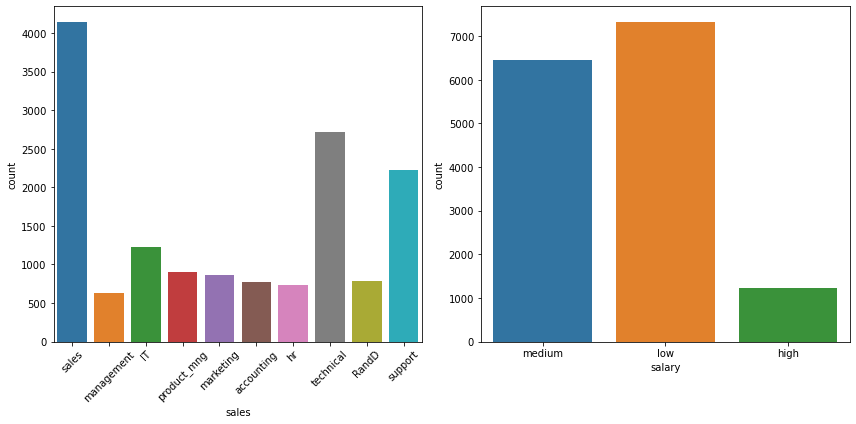

<Figure size 432x288 with 0 Axes>

In [30]:
# with histograms to display 10 features
fig, axs = plt.subplots(ncols=2,figsize=(12,6))
g = sns.countplot(x=data["sales"], ax=axs[0])
plt.setp(g.get_xticklabels(), rotation=45)
g = sns.countplot(x=data["salary"], ax=axs[1])
plt.tight_layout()
plt.show()
plt.gcf().clear()

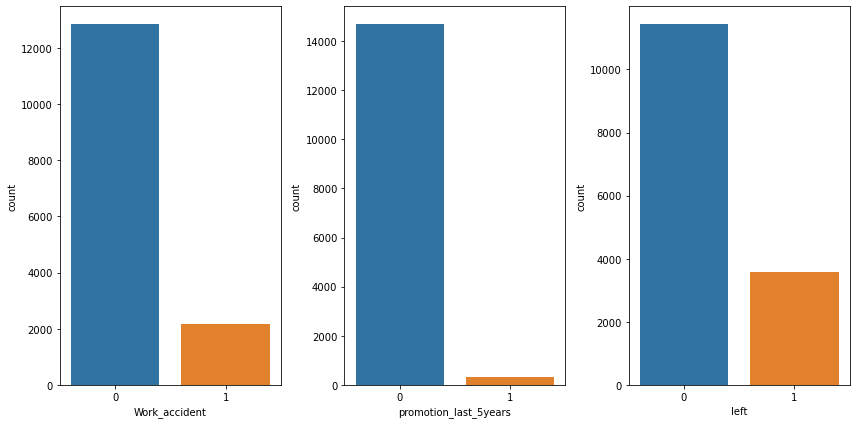

<Figure size 432x288 with 0 Axes>

In [31]:
# let's check something more specific
fig, axs = plt.subplots(ncols=3,figsize=(12,6))
sns.countplot(x=data["Work_accident"], ax=axs[0])
sns.countplot(x=data["promotion_last_5years"], ax=axs[1])
sns.countplot(x=data["left"], ax=axs[2])
plt.tight_layout()
plt.show()
plt.gcf().clear()

/Users/qianxi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/qianxi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/qianxi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

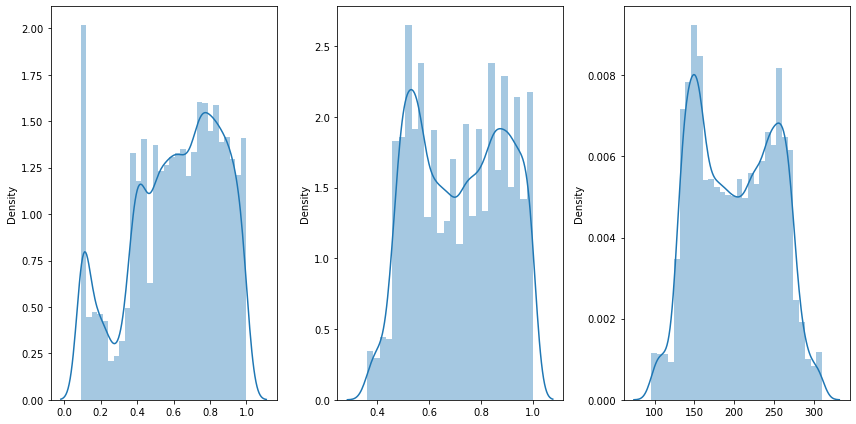

<Figure size 432x288 with 0 Axes>

In [32]:
fig, axs = plt.subplots(ncols=3,figsize=(12,6))
sns.distplot(x=data["satisfaction_level"], ax=axs[0])
sns.distplot(x=data["last_evaluation"], ax=axs[1])
sns.distplot(x=data["average_montly_hours"], ax=axs[2])
plt.tight_layout()
plt.show()
plt.gcf().clear()

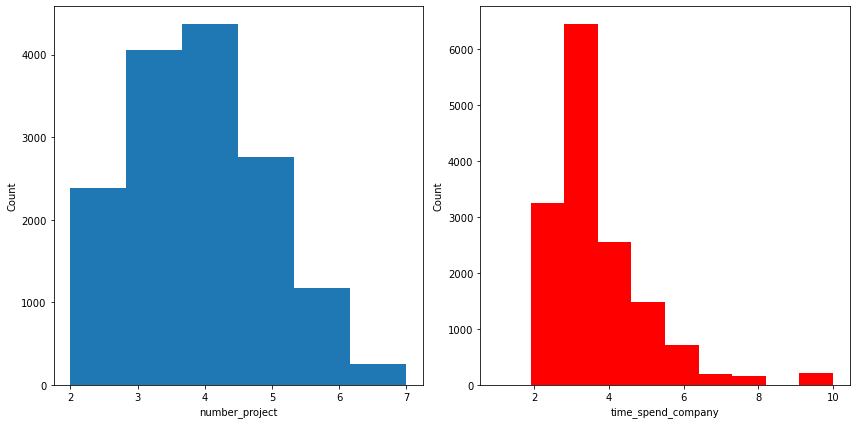

<Figure size 432x288 with 0 Axes>

In [33]:
fig, axs = plt.subplots(ncols=2,figsize=(12,6))
axs[0].hist(data["number_project"],bins=6)
axs[0].set_xlabel("number_project")
axs[0].set_ylabel("Count")
axs[1].hist(data["time_spend_company"],bins=10,color="r",range=(1,10))
axs[1].set_xlabel("time_spend_company")
axs[1].set_ylabel("Count")
plt.tight_layout()
plt.show()
plt.gcf().clear()

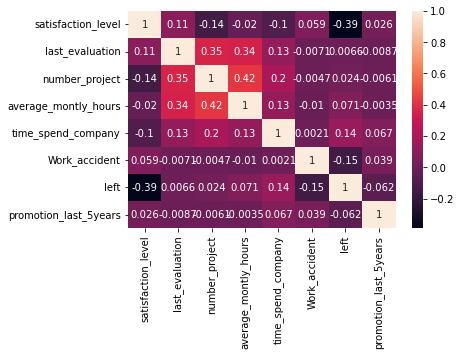

In [34]:
# data corr could be used to find more info about features relation
g = sns.heatmap(data.corr(),annot=True)

In [35]:
# automatically output the report of the data
import pandas_profiling
pfr = pandas_profiling.ProfileReport(data)
pfr.to_file("./example.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]